In [10]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
iris = pd.read_csv('../CSV/iris.csv')

In [4]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 1: Split the set into two sets

"X" will be the data and "Y" will be the class labels

In [28]:
X = iris.ix[:,0:4].values
y = iris.ix[:,4].values

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

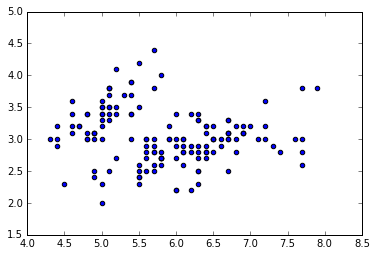

In [29]:
plt.scatter(iris['SepalLength'], iris['SepalWidth'])

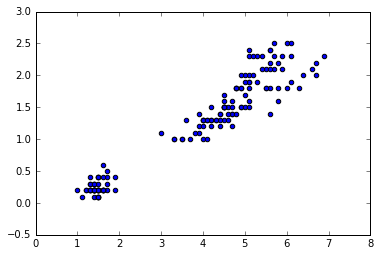

In [30]:
plt.scatter(iris['PetalLength'], iris['PetalWidth'])

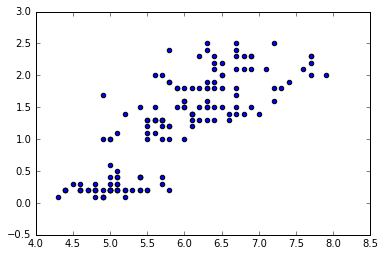

In [31]:
plt.scatter(iris['SepalLength'], iris['PetalWidth'])

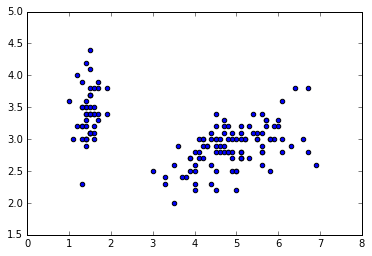

In [32]:
plt.scatter(iris['PetalLength'], iris['SepalWidth'])

## Step 3: Dimensionality Reduction

First, standarize the data. While the Iris data attributes are all measured in the same units (cm), this is a worthwhile step for optimization and good practice for more unruly datasets!

In [33]:
X_standard = StandardScaler().fit_transform(X)

Now, let's set up our data for decomposition by creating a covariance matrix

In [34]:
cov_mat = np.cov(X_standard.T)

Now, decompose the the covariance matrix

In [35]:
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

Check the eigenvalues and eigenvectors

In [36]:
eigenValues

array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601])

In [37]:
eigenVectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

The eigenvectors with the lowest eigenvalues can be dropped

In [41]:
eig_pairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eig_pairs.sort()
eig_pairs.reverse()
for i in eig_pairs:
    print(i[0])

2.93035377559
0.927403621517
0.148342226482
0.0207460139956


Calculate the explained variance

In [47]:
tot = sum(eigenValues)
var_exp = [(i / tot)*100 for i in sorted(eigenValues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

What does the explained variance tell us?

In [48]:
print(cum_var_exp)

[  72.77045209   95.80097536   99.48480732  100.        ]
